In [1]:
import requests
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from ISIn import BurstDetector

## Download Sample Data

In [3]:
datadir = Path("./data/")
datadir.mkdir(exist_ok=True)

filename = "sample.csv"
filepath = datadir / filename

# csv_url = "https://gin.g-node.org/NeuroGroup_TUNI/Comparative_MEA_dataset/raw/master/Data/Rat_MEA1/Rat_MEA1_spikes_noise_explogs/Rat_190617_MEA1_DIV14_spikes.csv"
# response = requests.get(csv_url, headers={"Content-type": "text/csv"})

# if response.status_code == 200:
#     with open(filepath, 'wb') as file:
#         file.write(response.content)

#     print(f"CSV file downloaded and saved as {filepath}")
# else:
#     print(f"Failed to download the CSV file. Status code: {response.status_code}")

## Burst Detection with ISIn

In [4]:
df = pd.read_csv(filepath)

unique_channels = df['Channel'].unique()
channel_to_id = {channel: id for id, channel in enumerate(unique_channels)}
df['Channel_ID'] = df['Channel'].map(channel_to_id)

<Axes: xlabel='Time', ylabel='Channel_ID'>

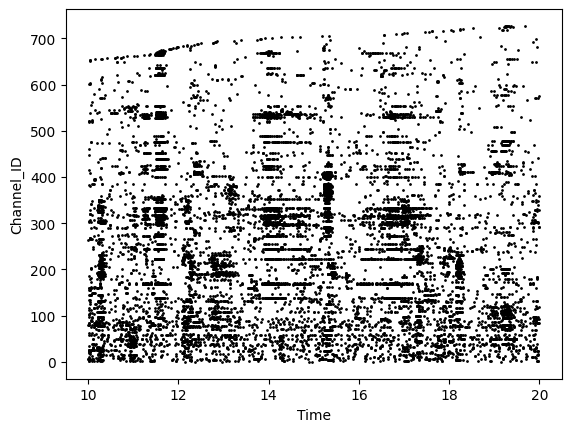

In [5]:
df_ = df.query("10 <= Time <= 20")
df_.plot.scatter(y="Channel_ID", x="Time", s=1, c="k")

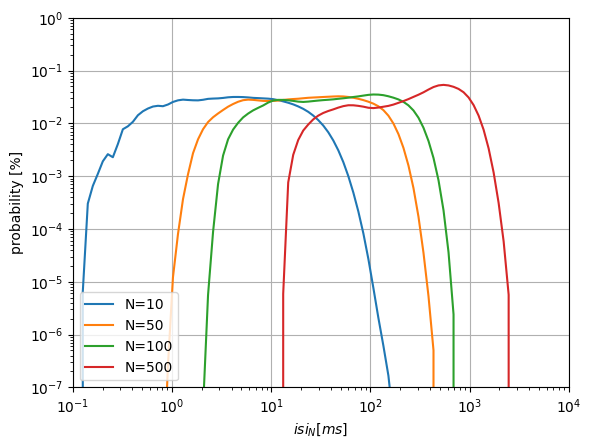

In [6]:
ax = BurstDetector.plot(
    spiketime=df.Time,
    n_list=[10, 50, 100, 500],
)

plt.show()

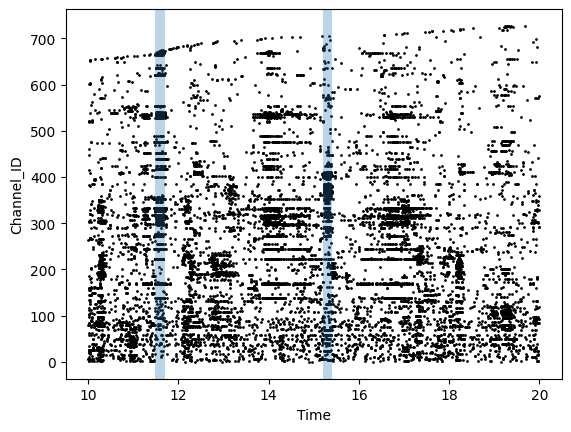

In [7]:
ax = df_.plot.scatter(y="Channel_ID", x="Time", s=1, c="k")

bursts = BurstDetector.detect(spiketime=df_.Time, n=500, threshold=100)
for burst in bursts:
    ax.axvspan(burst[0], burst[1], alpha=0.3)

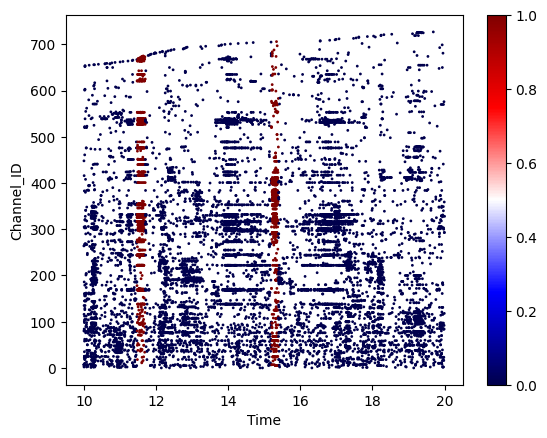

In [8]:
idx = BurstDetector.detect(spiketime=df_.Time, n=500, threshold=100, return_idx=True)
ax = df_.plot.scatter(y="Channel_ID", x="Time", s=1, c=idx, cmap="seismic")